In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON UMAP DATA")
print("="*70)

# ============================================================
# STEP 1: Load UMAP-Reduced Data
# ============================================================
print("\n[Step 1] Loading UMAP-reduced data...")

df_umap = pd.read_csv('Data/umap_dataset.csv')
print(f"✓ Loaded UMAP data: {df_umap.shape}")
print(f"  Samples: {df_umap.shape[0]}")
print(f"  Features (UMAP Components): {df_umap.shape[1]}")
print(df_umap.head())

C2C PROJECT - KMEANS CLUSTERING ON UMAP DATA

[Step 1] Loading UMAP-reduced data...
✓ Loaded UMAP data: (9442, 20)
  Samples: 9442
  Features (UMAP Components): 20
       UMAP1      UMAP2     UMAP3     UMAP4     UMAP5     UMAP6     UMAP7  \
0  13.044344  10.758992  4.299340  6.452539  4.473459  6.014882  5.330154   
1  12.796163  11.062819  4.304844  6.981329  4.765934  5.360682  5.398940   
2  13.074598  10.829733  4.337857  6.422685  4.503576  5.976129  5.317927   
3  13.123670  10.672063  4.332549  6.510571  4.579453  5.690722  5.347566   
4  -4.822392   4.403485  3.378770  1.743871  5.786593  5.177172  3.257690   

      UMAP8     UMAP9    UMAP10    UMAP11    UMAP12    UMAP13    UMAP14  \
0  5.876545  5.014337  4.665550  6.262364  4.662397  4.959200  6.291241   
1  4.559891  3.167678  5.093019  6.499689  4.220755  4.531321  5.870240   
2  5.869507  4.991777  4.661331  6.235278  4.685154  4.956694  6.269872   
3  5.698466  4.510261  4.686782  6.168470  4.892799  4.887476  6.068507  

In [2]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 11)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_umap)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_umap, labels)
    davies_bouldin = davies_bouldin_score(df_umap, labels)
    calinski = calinski_harabasz_score(df_umap, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 38,574.34
  Silhouette Score: 0.8812 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.1333 (lower is better)
  Calinski-Harabasz Score: 135,756.00 (higher is better)

k=3:
  Inertia: 23,019.73
  Silhouette Score: 0.5537 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5128 (lower is better)
  Calinski-Harabasz Score: 116,920.65 (higher is better)

k=4:
  Inertia: 15,091.81
  Silhouette Score: 0.5113 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.7264 (lower is better)
  Calinski-Harabasz Score: 120,534.26 (higher is better)

k=5:
  Inertia: 11,524.67
  Silhouette Score: 0.5255 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.7155 (lower is better)
  Calinski-Harabasz Score: 119,099.12 (higher is better)

k=6:
  Inertia: 9,742.06
  Silhouette Score: 0.5242 (h

[Step 3] Visualizing clustering evaluation metrics...
✓ Saved: umap_clustering_evaluation.png


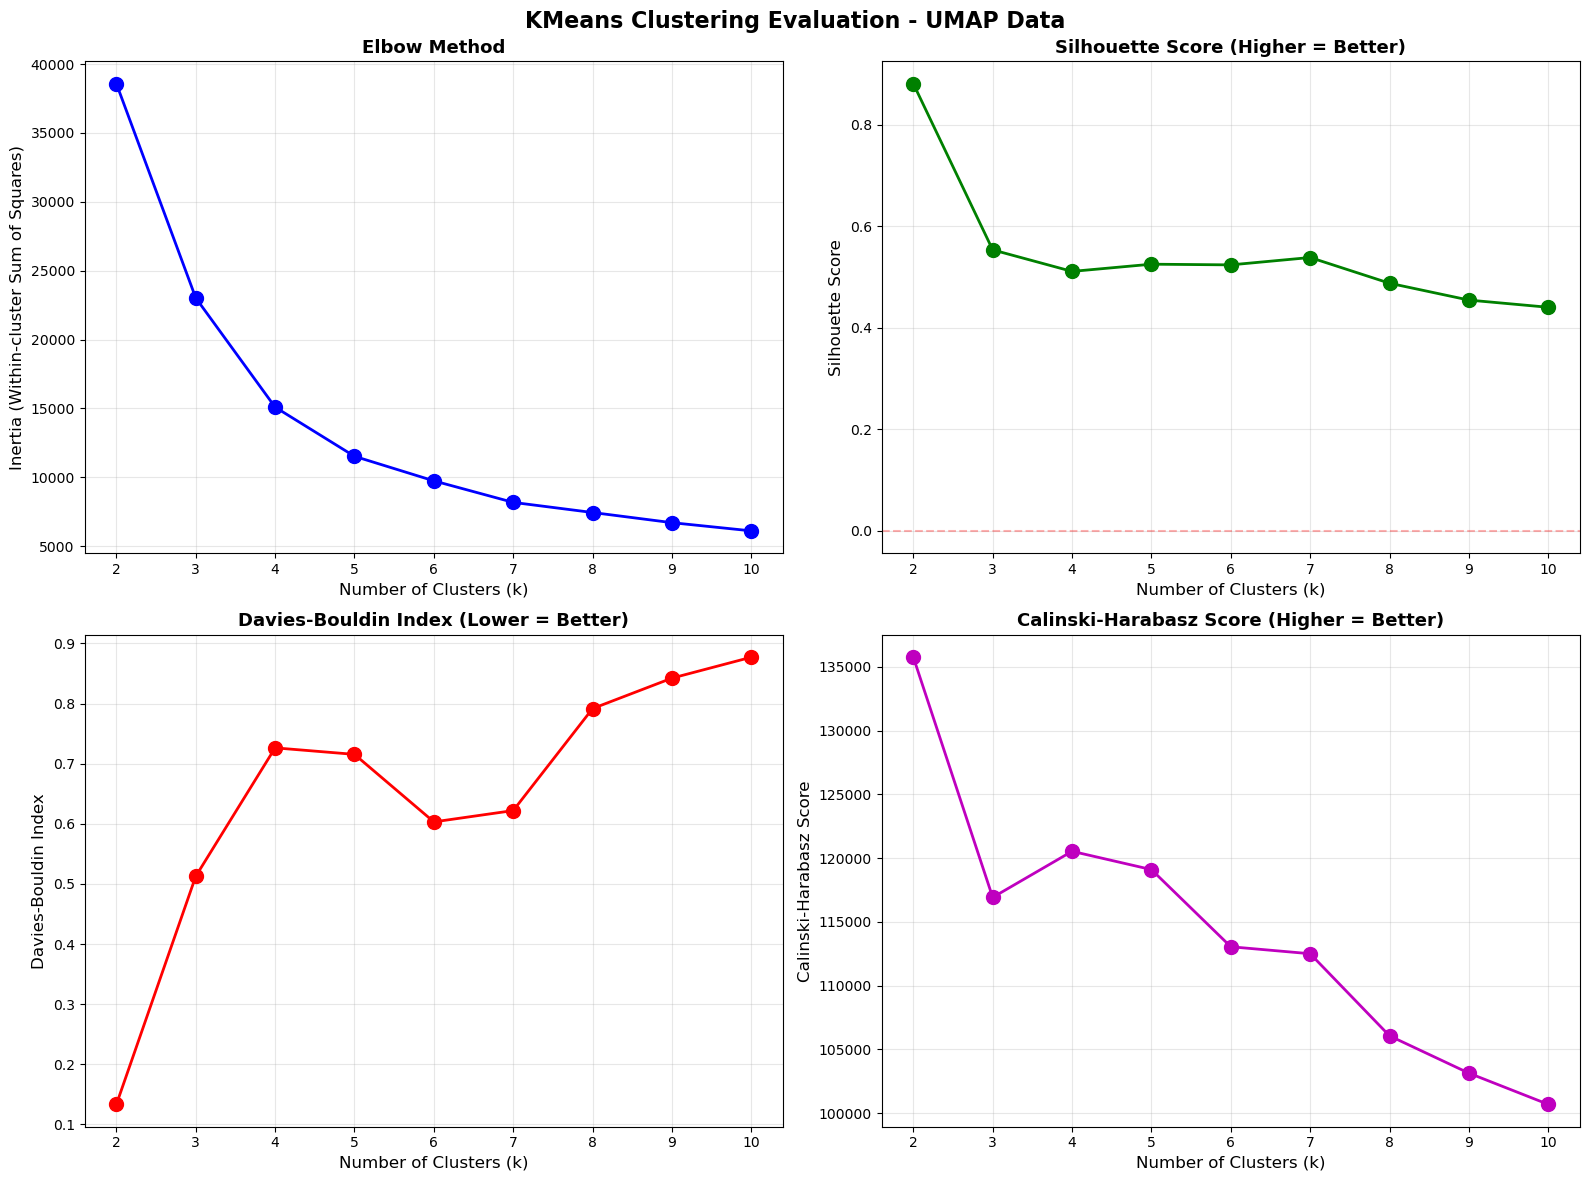

In [3]:
# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - UMAP Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
print("✓ Saved: umap_clustering_evaluation.png")
plt.show()

In [4]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")

print("\n" + "="*70)
print("PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k")
print("="*70)


[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 2
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 2
Approximate elbow point: 9

PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k


In [5]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 4

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_umap)

# Add cluster labels to dataframe
df_umap['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_umap.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_umap.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_umap.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")


[Step 5] Applying KMeans with k=4...
----------------------------------------------------------------------
✓ Clustering complete with k=4

Final Clustering Metrics:
  Silhouette Score: 0.5114
  Davies-Bouldin Index: 0.7264
  Calinski-Harabasz Score: 120,535.23


In [6]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_umap['Cluster'].value_counts().sort_index()
cluster_percentages = (df_umap['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio > 10:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio > 5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")


[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 3,248 patients (34.40%)
  Cluster 1: 1,556 patients (16.48%)
  Cluster 2: 1,592 patients (16.86%)
  Cluster 3: 3,046 patients (32.26%)

Cluster Balance:
  Largest cluster: 3,248 patients
  Smallest cluster: 1,556 patients
  Imbalance ratio: 2.09x
  ✓ Clusters are reasonably balanced



[Step 7] Visualizing clusters...
✓ Saved: umap_clusters_2d.png


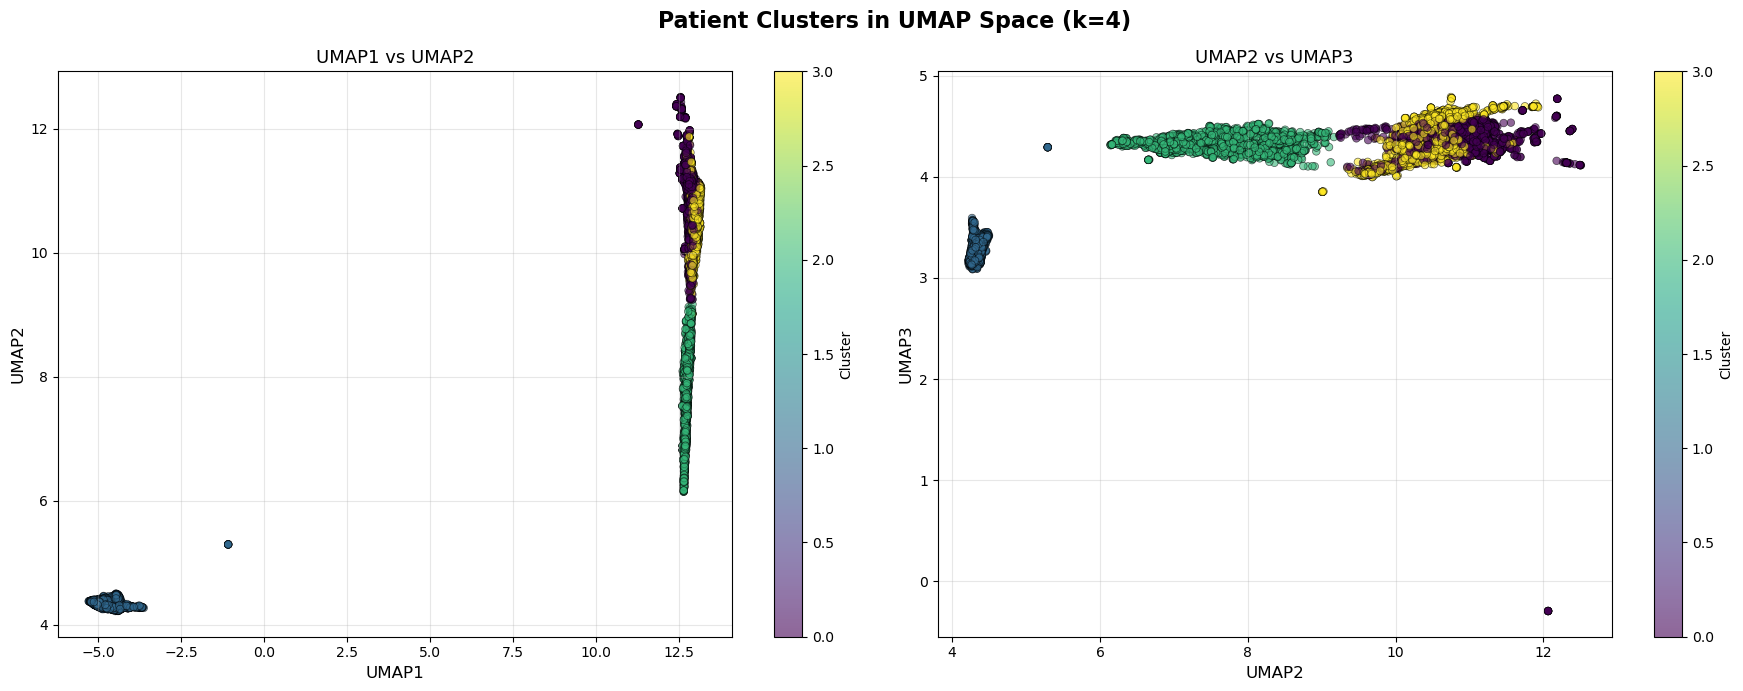

✓ Saved: umap_clusters_3d.png


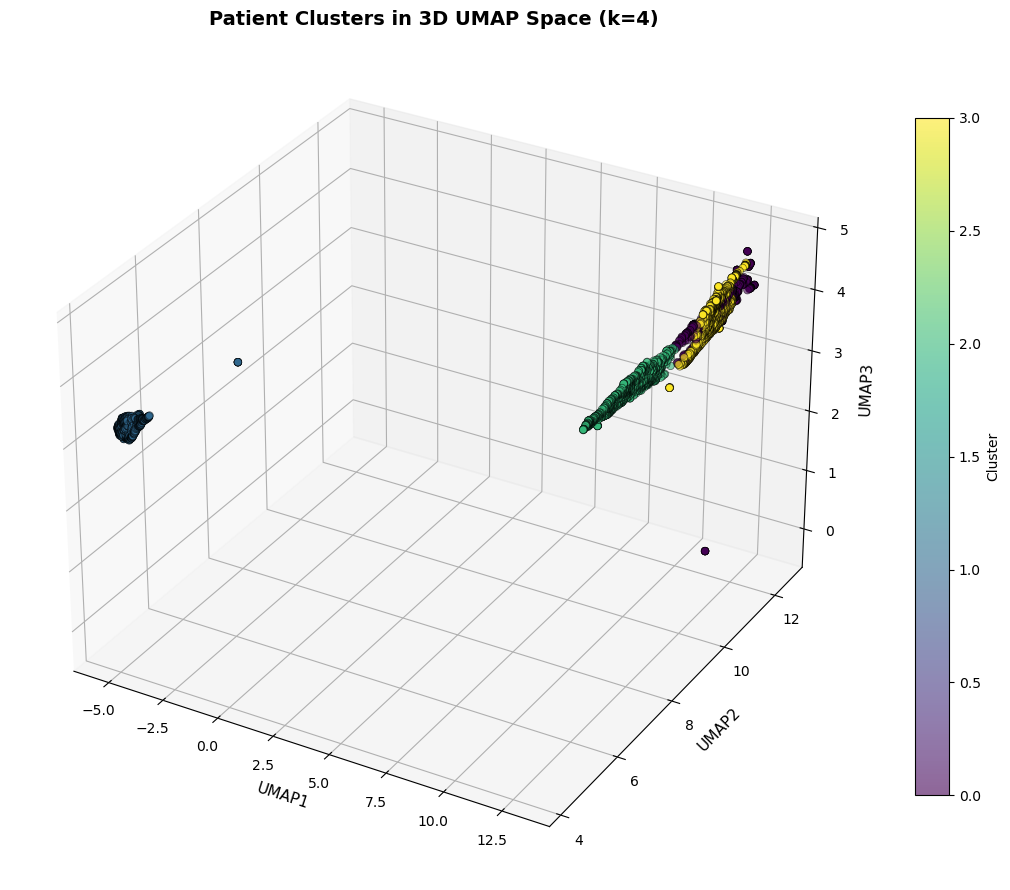

✓ Saved: umap_cluster_distribution.png


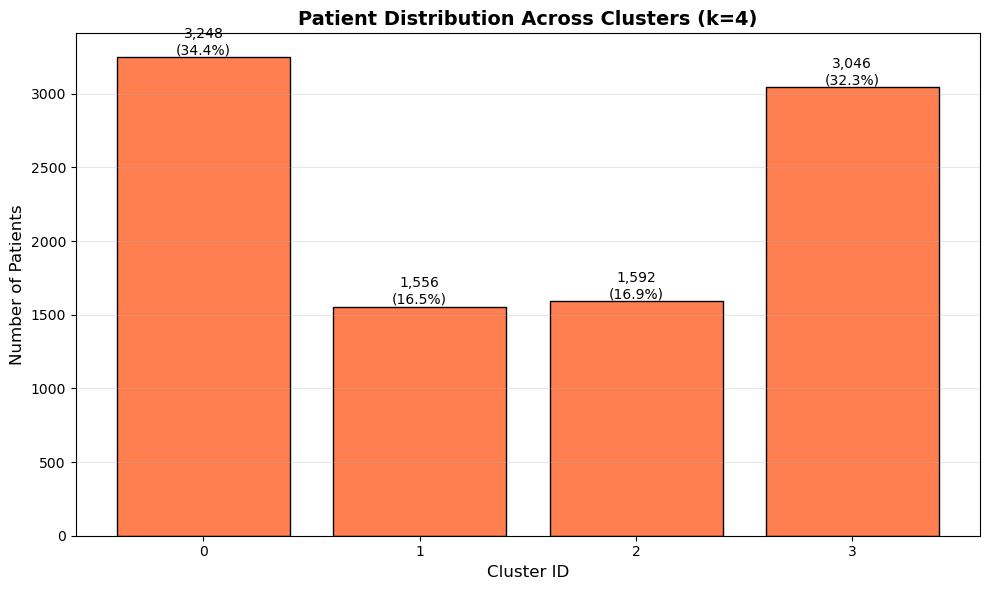

In [7]:
# ============================================================
# STEP 7: Visualize Clusters
# ============================================================
print("\n[Step 7] Visualizing clusters...")

# 2D visualization (UMAP1 vs UMAP2)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle(f'Patient Clusters in UMAP Space (k={optimal_k})', 
            fontsize=16, fontweight='bold')

# Plot 1: UMAP1 vs UMAP2
scatter1 = axes[0].scatter(
    df_umap['UMAP1'], 
    df_umap['UMAP2'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[0].set_xlabel('UMAP1', fontsize=12)
axes[0].set_ylabel('UMAP2', fontsize=12)
axes[0].set_title('UMAP1 vs UMAP2', fontsize=13)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: UMAP2 vs UMAP3
scatter2 = axes[1].scatter(
    df_umap['UMAP2'], 
    df_umap['UMAP3'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[1].set_xlabel('UMAP2', fontsize=12)
axes[1].set_ylabel('UMAP3', fontsize=12)
axes[1].set_title('UMAP2 vs UMAP3', fontsize=13)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
print("✓ Saved: umap_clusters_2d.png")
plt.show()

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_umap['UMAP1'],
    df_umap['UMAP2'],
    df_umap['UMAP3'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('UMAP1', fontsize=11)
ax.set_ylabel('UMAP2', fontsize=11)
ax.set_zlabel('UMAP3', fontsize=11)
ax.set_title(f'Patient Clusters in 3D UMAP Space (k={optimal_k})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: umap_clusters_3d.png")
plt.show()

# Cluster size bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_k), cluster_counts, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Patient Distribution Across Clusters (k={optimal_k})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({cluster_percentages[i]:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
print("✓ Saved: umap_cluster_distribution.png")
plt.show()

### Now lets see if we can break down the other cluster 0 into smaller ones - Because it is reasonalbly bigenough

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("SUB-CLUSTERING LARGE UMAP CLUSTERS (0 & 3 ONLY)")
print("="*70)

# ============================================================
# CURRENT STATE
# ============================================================
print("\nCurrent cluster distribution:")
print(df_umap['Cluster'].value_counts().sort_index())

# ============================================================
# STEP 1: Extract Clusters 0 and 4
# ============================================================
print("\n" + "="*70)
print("EXTRACTING CLUSTERS 0 AND 4 FOR SUB-CLUSTERING")
print("="*70)

cluster_0_data = df_umap[df_umap['Cluster'] == 0].copy()
cluster_4_data = df_umap[df_umap['Cluster'] == 3].copy()

print(f"\nCluster 0: {len(cluster_0_data):,} patients")
print(f"Cluster 4: {len(cluster_4_data):,} patients")

SUB-CLUSTERING LARGE UMAP CLUSTERS (0 & 3 ONLY)

Current cluster distribution:
Cluster
0    3248
1    1556
2    1592
3    3046
Name: count, dtype: int64

EXTRACTING CLUSTERS 0 AND 4 FOR SUB-CLUSTERING

Cluster 0: 3,248 patients
Cluster 4: 3,046 patients


In [9]:
# ============================================================
# STEP 2: Analyze Cluster 0
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 0 SUB-CLUSTERING")
print("="*70)

cluster_0_features = cluster_0_data.drop(columns=['Cluster'])
sub_cluster_range = range(2, 5)
metrics_c0 = {'k': [], 'silhouette': [], 'davies_bouldin': []}

print("\nEvaluating sub-cluster options for Cluster 0:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_0_features)
    
    sil = silhouette_score(cluster_0_features, labels)
    db = davies_bouldin_score(cluster_0_features, labels)
    
    metrics_c0['k'].append(k)
    metrics_c0['silhouette'].append(sil)
    metrics_c0['davies_bouldin'].append(db)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f}")
    print(f"  Davies-Bouldin: {db:.4f}")
    print()

best_k_c0 = metrics_c0['k'][np.argmax(metrics_c0['silhouette'])]
print(f"Recommended for Cluster 0: {best_k_c0} sub-clusters")


ANALYZING CLUSTER 0 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 0:

k=2:
  Silhouette: 0.3774
  Davies-Bouldin: 1.1124

k=3:
  Silhouette: 0.3200
  Davies-Bouldin: 1.1710

k=4:
  Silhouette: 0.2636
  Davies-Bouldin: 1.1960

Recommended for Cluster 0: 2 sub-clusters


In [10]:
# ============================================================
# STEP 3: Analyze Cluster 4
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 4 SUB-CLUSTERING")
print("="*70)

cluster_4_features = cluster_4_data.drop(columns=['Cluster'])
metrics_c3 = {'k': [], 'silhouette': [], 'davies_bouldin': []}

print("\nEvaluating sub-cluster options for Cluster 4:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_4_features)
    
    sil = silhouette_score(cluster_4_features, labels)
    db = davies_bouldin_score(cluster_4_features, labels)
    
    metrics_c3['k'].append(k)
    metrics_c3['silhouette'].append(sil)
    metrics_c3['davies_bouldin'].append(db)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f}")
    print(f"  Davies-Bouldin: {db:.4f}")
    print()

best_k_c3 = metrics_c3['k'][np.argmax(metrics_c3['silhouette'])]
print(f"Recommended for Cluster 4: {best_k_c3} sub-clusters")


ANALYZING CLUSTER 4 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 4:

k=2:
  Silhouette: 0.5033
  Davies-Bouldin: 0.8000

k=3:
  Silhouette: 0.3655
  Davies-Bouldin: 1.1666

k=4:
  Silhouette: 0.3411
  Davies-Bouldin: 1.1231

Recommended for Cluster 4: 2 sub-clusters



✓ Saved: umap_sub_clustering_evaluation.png


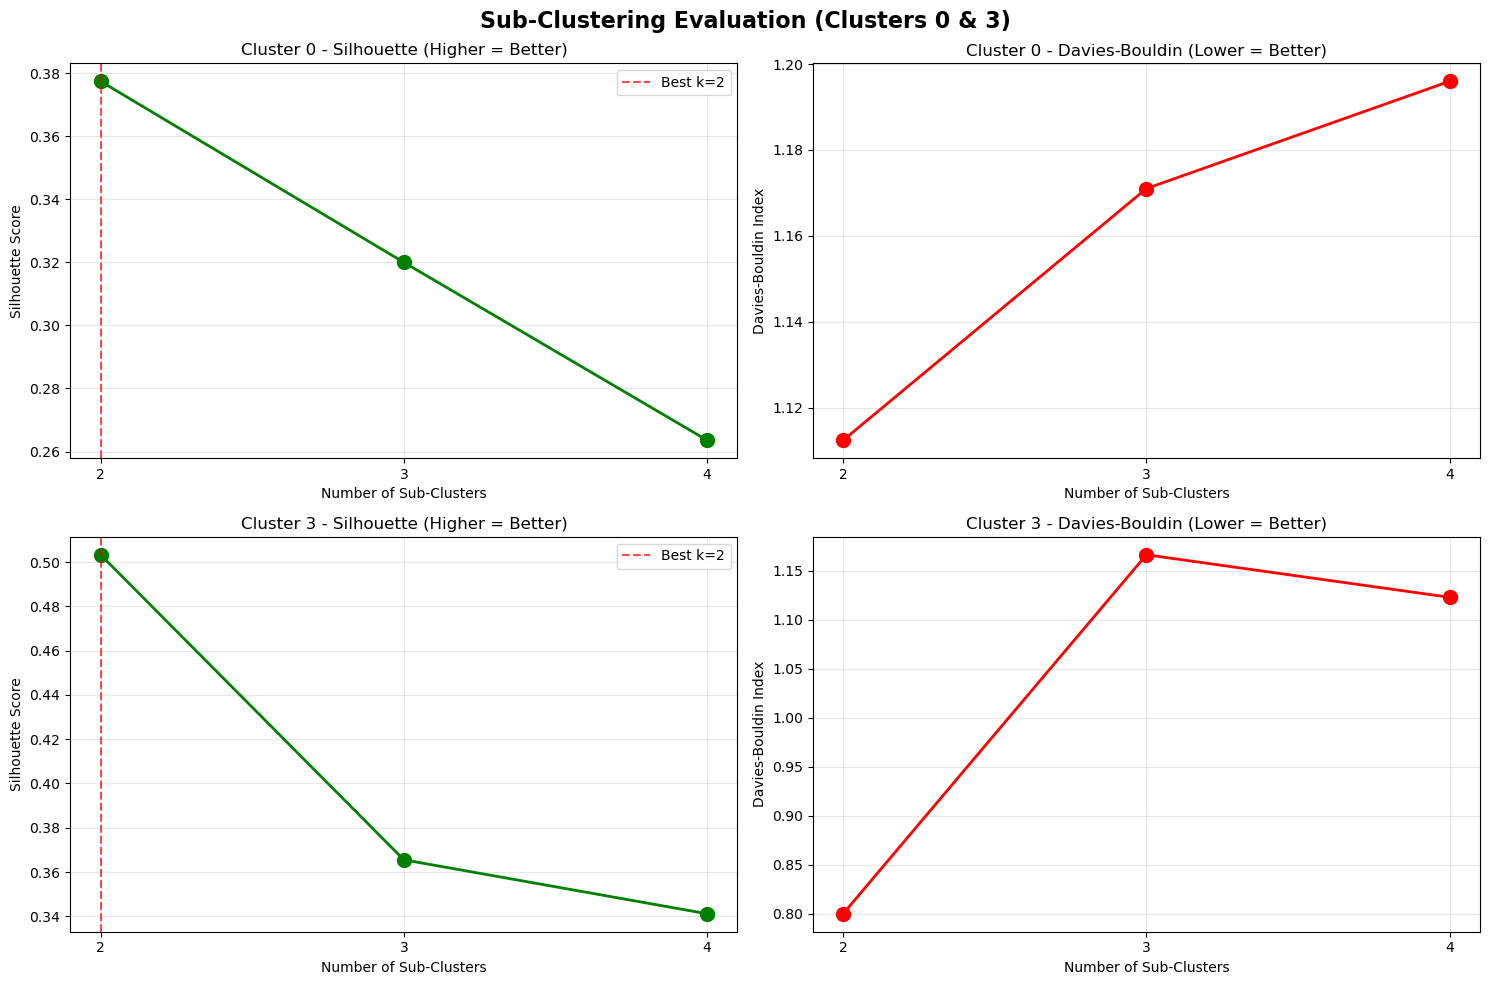

In [11]:
# ============================================================
# STEP 4: Visualize Evaluation
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sub-Clustering Evaluation (Clusters 0 & 3)', fontsize=16, fontweight='bold')

# Cluster 0
axes[0, 0].plot(metrics_c0['k'], metrics_c0['silhouette'], 'go-', linewidth=2, markersize=10)
axes[0, 0].axvline(x=best_k_c0, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c0}')
axes[0, 0].set_xlabel('Number of Sub-Clusters')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Cluster 0 - Silhouette (Higher = Better)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics_c0['k'])
axes[0, 0].legend()

axes[0, 1].plot(metrics_c0['k'], metrics_c0['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Sub-Clusters')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Cluster 0 - Davies-Bouldin (Lower = Better)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics_c0['k'])

# Cluster 3
axes[1, 0].plot(metrics_c3['k'], metrics_c3['silhouette'], 'go-', linewidth=2, markersize=10)
axes[1, 0].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[1, 0].set_xlabel('Number of Sub-Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Cluster 3 - Silhouette (Higher = Better)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics_c3['k'])
axes[1, 0].legend()

axes[1, 1].plot(metrics_c3['k'], metrics_c3['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Sub-Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Cluster 3 - Davies-Bouldin (Lower = Better)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics_c3['k'])

plt.tight_layout()
print("\n✓ Saved: umap_sub_clustering_evaluation.png")
plt.show()

In [14]:
# ============================================================
# STEP 5: User Input
# ============================================================
print("\n" + "="*70)
print("CHOOSE SUB-CLUSTER SIZES")
print("="*70)

k_split_c0 = 3
k_split_c3 = 2

# ============================================================
# STEP 6: Apply Sub-Clustering
# ============================================================
print("\n" + "="*70)
print("APPLYING SUB-CLUSTERING")
print("="*70)

print(f"\nSub-clustering Cluster 0 into {k_split_c0} groups...")
kmeans_c0 = KMeans(n_clusters=k_split_c0, random_state=42, n_init=50)
sub_labels_c0 = kmeans_c0.fit_predict(cluster_0_features)

print(f"Sub-clustering Cluster 4 into {k_split_c3} groups...")
kmeans_c3 = KMeans(n_clusters=k_split_c3, random_state=42, n_init=50)
sub_labels_c3 = kmeans_c3.fit_predict(cluster_4_features)


CHOOSE SUB-CLUSTER SIZES

APPLYING SUB-CLUSTERING

Sub-clustering Cluster 0 into 3 groups...
Sub-clustering Cluster 4 into 2 groups...


In [15]:
# ============================================================
# STEP 7: Create Refined Labels
# ============================================================
print("\n" + "="*70)
print("CREATING REFINED CLUSTER STRUCTURE")
print("="*70)

df_umap_refined = df_umap.copy()
df_umap_refined['Cluster_Original'] = df_umap_refined['Cluster'].copy()
df_umap_refined['Cluster_Refined'] = df_umap_refined['Cluster'].copy()

# New cluster mapping:
# Cluster 0 → splits into 0, 1, 2, ... (k_split_c0 clusters)
# Cluster 1 → stays as next ID
# Cluster 2 → stays as next ID
# Cluster 3 → splits into next IDs
# Cluster 4 → stays as next ID

new_cluster_id = 0

# Cluster 0 sub-clusters
for idx, sub_label in zip(cluster_0_data.index, sub_labels_c0):
    df_umap_refined.loc[idx, 'Cluster_Refined'] = new_cluster_id + sub_label

new_cluster_id += k_split_c0

# Cluster 1 stays as-is
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 1, 'Cluster_Refined'] = new_cluster_id
new_cluster_id += 1

# Cluster 2 stays as-is
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 2, 'Cluster_Refined'] = new_cluster_id
new_cluster_id += 1

# Cluster 3 stays as-is
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 3, 'Cluster_Refined'] = new_cluster_id
new_cluster_id += 1

# Cluster 4 sub-clusters
for idx, sub_label in zip(cluster_4_data.index, sub_labels_c3):
    df_umap_refined.loc[idx, 'Cluster_Refined'] = new_cluster_id + sub_label

new_cluster_id += k_split_c3

# Update main cluster column
df_umap_refined['Cluster'] = df_umap_refined['Cluster_Refined']

print("\nOriginal clustering:")
print(df_umap['Cluster'].value_counts().sort_index())

print("\nRefined clustering:")
print(df_umap_refined['Cluster'].value_counts().sort_index())

total_clusters = len(df_umap_refined['Cluster'].unique())
print(f"\nTotal clusters: {total_clusters}")


CREATING REFINED CLUSTER STRUCTURE

Original clustering:
Cluster
0    3248
1    1556
2    1592
3    3046
Name: count, dtype: int64

Refined clustering:
Cluster
0    1419
1     538
2    1291
3    1556
4    1592
6    1979
7    1067
Name: count, dtype: int64

Total clusters: 7



VISUALIZING REFINED CLUSTERS
✓ Saved: umap_refined_clusters_3d.png


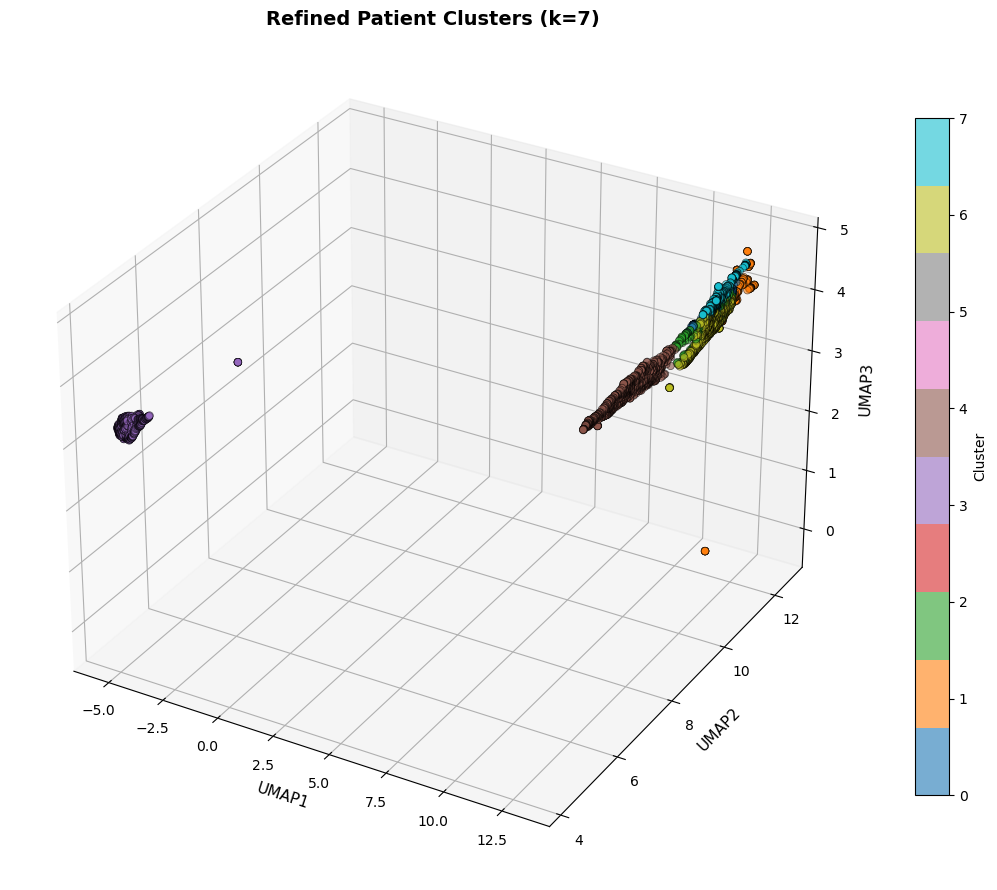

✓ Saved: umap_refined_distribution.png


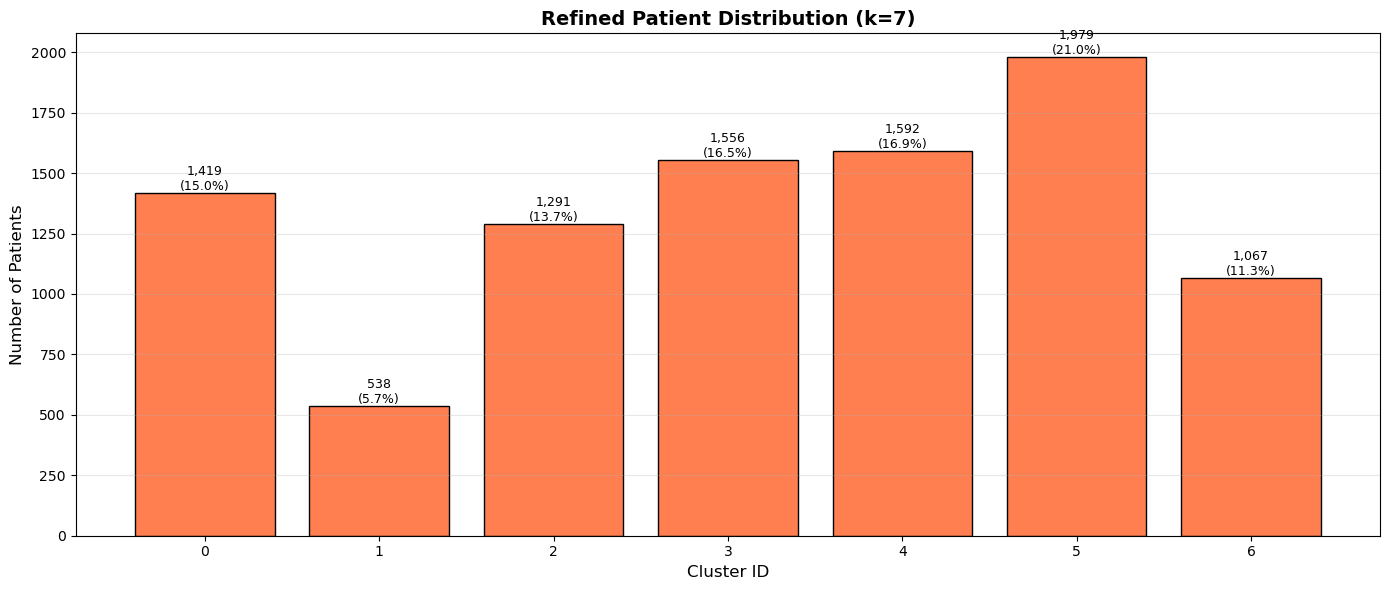

In [16]:
# ============================================================
# STEP 8: Visualize
# ============================================================
print("\n" + "="*70)
print("VISUALIZING REFINED CLUSTERS")
print("="*70)

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_umap_refined['UMAP1'],
    df_umap_refined['UMAP2'],
    df_umap_refined['UMAP3'],
    c=df_umap_refined['Cluster'],
    cmap='tab10',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('UMAP1', fontsize=11)
ax.set_ylabel('UMAP2', fontsize=11)
ax.set_zlabel('UMAP3', fontsize=11)
ax.set_title(f'Refined Patient Clusters (k={total_clusters})', fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: umap_refined_clusters_3d.png")
plt.show()

# Distribution plot
cluster_counts_refined = df_umap_refined['Cluster'].value_counts().sort_index()
cluster_percentages_refined = (df_umap_refined['Cluster'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(range(total_clusters), cluster_counts_refined, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Refined Patient Distribution (k={total_clusters})', fontsize=14, fontweight='bold')
plt.xticks(range(total_clusters))
plt.grid(True, alpha=0.3, axis='y')

for i, cluster_id in enumerate(cluster_counts_refined.index):
    height = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    plt.text(i, height, f'{int(height):,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
print("✓ Saved: umap_refined_distribution.png")
plt.show()

In [17]:
# ============================================================
# STEP 9: Calculate Metrics
# ============================================================
print("\n" + "="*70)
print("FINAL METRICS")
print("="*70)

cluster_features = df_umap_refined.drop(columns=['Cluster', 'Cluster_Original', 'Cluster_Refined'])
final_silhouette = silhouette_score(cluster_features, df_umap_refined['Cluster'])
final_db = davies_bouldin_score(cluster_features, df_umap_refined['Cluster'])
final_ch = calinski_harabasz_score(cluster_features, df_umap_refined['Cluster'])

print(f"\nSilhouette Score: {final_silhouette:.4f}")
print(f"Davies-Bouldin Index: {final_db:.4f}")
print(f"Calinski-Harabasz Score: {final_ch:,.2f}")

print(f"\nCluster Summary:")
for cluster_id in sorted(df_umap_refined['Cluster'].unique()):
    count = len(df_umap_refined[df_umap_refined['Cluster'] == cluster_id])
    pct = (count / len(df_umap_refined)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


FINAL METRICS

Silhouette Score: 0.4786
Davies-Bouldin Index: 0.9013
Calinski-Harabasz Score: 97,954.99

Cluster Summary:
  Cluster 0: 1,419 patients (15.0%)
  Cluster 1: 538 patients (5.7%)
  Cluster 2: 1,291 patients (13.7%)
  Cluster 3: 1,556 patients (16.5%)
  Cluster 4: 1,592 patients (16.9%)
  Cluster 6: 1,979 patients (21.0%)
  Cluster 7: 1,067 patients (11.3%)


### Add the clusters to the original dataset and perform EDA on them!

In [23]:
import pandas as pd

print("="*70)
print("APPENDING CLUSTER LABELS TO ORIGINAL DATASET")
print("="*70)

# ============================================================
# STEP 1: Load Original Dataset
# ============================================================
print("\n[Step 1] Loading original dataset...")

df_original = pd.read_csv('Data/train_dataset.csv')
print(f"✓ Original dataset loaded: {df_original.shape}")


APPENDING CLUSTER LABELS TO ORIGINAL DATASET

[Step 1] Loading original dataset...
✓ Original dataset loaded: (9442, 46)


In [24]:
# ============================================================
# STEP 2: Extract Cluster Labels from Existing DataFrames
# ============================================================
print("\n[Step 2] Extracting cluster labels from dataframes...")

# You already have df_pca_refined and df_umap_refined in memory
# Extract the cluster columns
umap_clusters = df_umap_refined['Cluster'].values

print(f"✓ UMAP clusters extracted: {len(umap_clusters)} labels")
print(f"  Unique UMAP clusters: {sorted(df_umap_refined['Cluster'].unique())}")


[Step 2] Extracting cluster labels from dataframes...
✓ UMAP clusters extracted: 9442 labels
  Unique UMAP clusters: [0, 1, 2, 3, 4, 6, 7]


In [25]:
df_umap.shape

(9442, 21)

In [26]:
print(df_umap.head())

       UMAP1      UMAP2     UMAP3     UMAP4     UMAP5     UMAP6     UMAP7  \
0  13.044344  10.758992  4.299340  6.452539  4.473459  6.014882  5.330154   
1  12.796163  11.062819  4.304844  6.981329  4.765934  5.360682  5.398940   
2  13.074598  10.829733  4.337857  6.422685  4.503576  5.976129  5.317927   
3  13.123670  10.672063  4.332549  6.510571  4.579453  5.690722  5.347566   
4  -4.822392   4.403485  3.378770  1.743871  5.786593  5.177172  3.257690   

      UMAP8     UMAP9    UMAP10  ...    UMAP12    UMAP13    UMAP14    UMAP15  \
0  5.876545  5.014337  4.665550  ...  4.662397  4.959200  6.291241  1.935579   
1  4.559891  3.167678  5.093019  ...  4.220755  4.531321  5.870240  1.834526   
2  5.869507  4.991777  4.661331  ...  4.685154  4.956694  6.269872  1.944281   
3  5.698466  4.510261  4.686782  ...  4.892799  4.887476  6.068507  1.770090   
4  6.006106  5.535817  3.833723  ...  1.616893  7.377511  8.744334  5.333966   

     UMAP16    UMAP17    UMAP18    UMAP19    UMAP20  Clu

In [27]:
# ============================================================
# STEP 3: Verify Alignment
# ============================================================
print("\n[Step 3] Verifying data alignment...")

if len(df_original) == len(umap_clusters):
    print(f"✓ All datasets aligned: {len(df_original)} rows")
else:
    print(f"⚠️  WARNING: Row count mismatch!")
    print(f"  Original dataset: {len(df_original)} rows")
    print(f"  PCA clusters: {len(umap_clusters)} rows")
    print("\n❌ Cannot proceed - datasets must have same number of rows")
    raise ValueError("Dataset size mismatch")


[Step 3] Verifying data alignment...
✓ All datasets aligned: 9442 rows


In [28]:
# ============================================================
# STEP 4: Append Cluster Labels
# ============================================================
print("\n[Step 4] Appending cluster labels to original dataset...")

# Create a copy
df_with_clusters = df_original.copy()

# Add cluster columns
df_with_clusters['umap_clusters'] = umap_clusters

print(f"✓ Added 'umap_clusters' column")



[Step 4] Appending cluster labels to original dataset...
✓ Added 'umap_clusters' column


In [29]:
# ============================================================
# STEP 5: Verify Results
# ============================================================
print("\n[Step 5] Verifying results...")

print(f"\nDataset shape: {df_with_clusters.shape}")
print(f"Columns added: {list(df_with_clusters.columns[-2:])}")

# Show distribution
print(f"\nPCA Cluster Distribution:")
umap_dist = df_with_clusters['umap_clusters'].value_counts().sort_index()
for cluster_id, count in umap_dist.items():
    pct = (count / len(df_with_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

# Check for missing values
print(f"\nMissing values check:")
print(f" umap_clusters: {df_with_clusters['umap_clusters'].isna().sum()}")

# Show sample
print(f"\nSample of data with clusters (first 10 rows):")
print(df_with_clusters[['umap_clusters']].head(10))



[Step 5] Verifying results...

Dataset shape: (9442, 47)
Columns added: ['Age_Group', 'umap_clusters']

PCA Cluster Distribution:
  Cluster 0: 1,419 patients (15.0%)
  Cluster 1: 538 patients (5.7%)
  Cluster 2: 1,291 patients (13.7%)
  Cluster 3: 1,556 patients (16.5%)
  Cluster 4: 1,592 patients (16.9%)
  Cluster 6: 1,979 patients (21.0%)
  Cluster 7: 1,067 patients (11.3%)

Missing values check:
 umap_clusters: 0

Sample of data with clusters (first 10 rows):
   umap_clusters
0              6
1              0
2              6
3              6
4              3
5              3
6              2
7              3
8              7
9              4


# EDA

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS")
print("="*70)

CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS


In [31]:
# ============================================================
# STEP 1: Load Data
# ============================================================
print("\n[Step 1] Loading enhanced dataset...")

df = df_with_clusters.copy()
print(f"✓ Dataset loaded: {df.shape}")
print(f"  Total patients: {len(df):,}")
print(f"  Features: {df.shape[1]}")

# Drop Unnamed: 0 if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')
    
print(f"✓ Final shape: {df.shape}")


[Step 1] Loading enhanced dataset...
✓ Dataset loaded: (9442, 47)
  Total patients: 9,442
  Features: 47
✓ Final shape: (9442, 47)


In [32]:
# ============================================================
# STEP 2: Define Feature Categories
# ============================================================
print("\n[Step 2] Categorizing features...")

# Demographic features
demographic_features = ['Gender', 'Age', 'Age_Group', 'Race_Ethnicity', 
                       'Country_of_Birth', 'Education_Level', 'Marital_Status']

# Socioeconomic features
socioeconomic_features = ['Income_to_Poverty_Ratio', 'Family_poverty_level_index',
                         'Household_Size', 'Covered_by_health_insurance', 
                         'Education_Level']

# Health conditions (Yes/No type)
health_conditions = [
    'Has_diabetes', 'Has_Disability', 'Has_Hepatitis', 'Has_Kidney_Failure',
    'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer', 'Had_high_blood_pressure'
]

# Clinical measurements (continuous numeric)
clinical_measurements = [
    'WBC', 'Haemoglobin', 'Platelete', 'HDL_mg', 'Cholestrol_level',
    'SystolicBP', 'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE'
]

# Lifestyle/behavioral
lifestyle_features = [
    'Takes_vitamin_supplements', 
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Number_of_hours_of_sleep'
]

# Health status (categorical)
health_status = [
    'General_health_condition', 'General_hearing_condition',
    'Teeth_and_gum_health', 'Tested_for_HIV_Virus',
    'Received_Hepatitis_A_Vaccine'
]

# Composite scores
composite_scores = [
    'blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
    'balance_impact_score', 'fall_risk_score', 'functional_difficulty_composite'
]

print(f"✓ Feature categories defined")
print(f"  Demographics: {len(demographic_features)}")
print(f"  Socioeconomic: {len(socioeconomic_features)}")
print(f"  Health Conditions: {len(health_conditions)}")
print(f"  Clinical Measurements: {len(clinical_measurements)}")
print(f"  Lifestyle: {len(lifestyle_features)}")
print(f"  Composite Scores: {len(composite_scores)}")


[Step 2] Categorizing features...
✓ Feature categories defined
  Demographics: 7
  Socioeconomic: 5
  Health Conditions: 11
  Clinical Measurements: 9
  Lifestyle: 4
  Composite Scores: 6


In [33]:
# ============================================================
# STEP 3: Basic Cluster Overview
# ============================================================
print("\n" + "="*70)
print("CLUSTER OVERVIEW - UMAP CLUSTERS")
print("="*70)

n_clusters_umap = df['umap_clusters'].nunique()
print(f"\nTotal UMAP clusters: {n_clusters_umap}")
print(f"\nCluster distribution:")

for cluster_id in sorted(df['umap_clusters'].unique()):
    count = len(df[df['umap_clusters'] == cluster_id])
    pct = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


CLUSTER OVERVIEW - UMAP CLUSTERS

Total UMAP clusters: 7

Cluster distribution:
  Cluster 0: 1,419 patients (15.0%)
  Cluster 1: 538 patients (5.7%)
  Cluster 2: 1,291 patients (13.7%)
  Cluster 3: 1,556 patients (16.5%)
  Cluster 4: 1,592 patients (16.9%)
  Cluster 6: 1,979 patients (21.0%)
  Cluster 7: 1,067 patients (11.3%)


In [34]:
# ============================================================
# STEP 4: Cluster Profiling - Demographics
# ============================================================
print("\n" + "="*70)
print("DEMOGRAPHIC PROFILE BY CLUSTER")
print("="*70)

demographic_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - DEMOGRAPHICS")
    print(f"{'='*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    cluster_demo = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    # Age
    mean_age = cluster_data['Age'].mean()
    median_age = cluster_data['Age'].median()
    cluster_demo['Mean_Age'] = mean_age
    cluster_demo['Median_Age'] = median_age
    print(f"\nAge:")
    print(f"  Mean: {mean_age:.1f} years")
    print(f"  Median: {median_age:.1f} years")
    print(f"  Range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f} years")
    
    # Age Group
    print(f"\nAge Group Distribution:")
    age_group_dist = cluster_data['Age_Group'].value_counts()
    for age_group, count in age_group_dist.head(3).items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {age_group}: {count:,} ({pct:.1f}%)")
    
    # Gender
    print(f"\nGender Distribution:")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    female_pct = (gender_dist.get('Female', 0) / len(cluster_data)) * 100
    cluster_demo['Male_%'] = male_pct
    cluster_demo['Female_%'] = female_pct
    print(f"  Male: {gender_dist.get('Male', 0):,} ({male_pct:.1f}%)")
    print(f"  Female: {gender_dist.get('Female', 0):,} ({female_pct:.1f}%)")
    
    # Race/Ethnicity
    print(f"\nRace/Ethnicity (Top 3):")
    race_dist = cluster_data['Race_Ethnicity'].value_counts().head(3)
    for race, count in race_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {race}: {count:,} ({pct:.1f}%)")
    
    # Education
    print(f"\nEducation Level (Top 3):")
    edu_dist = cluster_data['Education_Level'].value_counts().head(3)
    for edu, count in edu_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {edu}: {count:,} ({pct:.1f}%)")
    
    # Marital Status
    print(f"\nMarital Status (Top 2):")
    marital_dist = cluster_data['Marital_Status'].value_counts().head(2)
    for status, count in marital_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    demographic_summary.append(cluster_demo)

demographic_summary_df = pd.DataFrame(demographic_summary)
print("\n✓ Demographic summary created")


DEMOGRAPHIC PROFILE BY CLUSTER

CLUSTER 0 - DEMOGRAPHICS
Size: 1,419 patients (15.0%)

Age:
  Mean: 29.2 years
  Median: 27.0 years
  Range: 18 - 80 years

Age Group Distribution:
  19-30: 848 (59.8%)
  31-45: 480 (33.8%)
  46-60: 59 (4.2%)

Gender Distribution:
  Male: 733 (51.7%)
  Female: 686 (48.3%)

Race/Ethnicity (Top 3):
  Non-Hispanic White: 643 (45.3%)
  Non-Hispanic Black: 263 (18.5%)
  Mexican American: 178 (12.5%)

Education Level (Top 3):
  Some college or AA degree: 655 (46.2%)
  College graduate or above: 366 (25.8%)
  High school graduate/GED or equivalent: 287 (20.2%)

Marital Status (Top 2):
  Never married: 922 (65.0%)
  Married/Living with partner: 400 (28.2%)

CLUSTER 1 - DEMOGRAPHICS
Size: 538 patients (5.7%)

Age:
  Mean: 51.8 years
  Median: 52.0 years
  Range: 18 - 80 years

Age Group Distribution:
  61-75: 172 (32.0%)
  31-45: 159 (29.6%)
  46-60: 151 (28.1%)

Gender Distribution:
  Male: 264 (49.1%)
  Female: 274 (50.9%)

Race/Ethnicity (Top 3):
  Other Hisp

In [35]:
# ============================================================
# STEP 5: Health Condition Prevalence by Cluster
# ============================================================
print("\n" + "="*70)
print("HEALTH CONDITION PREVALENCE BY CLUSTER")
print("="*70)

health_prevalence = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - HEALTH CONDITIONS")
    print(f"{'='*70}")
    
    cluster_profile = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    for condition in health_conditions:
        # Calculate prevalence for 'Yes' responses
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prevalence = (yes_count / len(cluster_data)) * 100
        cluster_profile[condition] = prevalence
        
        if prevalence > 10:  # Only show if prevalence > 10%
            print(f"  {condition}: {prevalence:.1f}%")
    
    health_prevalence.append(cluster_profile)

health_prevalence_df = pd.DataFrame(health_prevalence)
print("\n✓ Health prevalence summary created")


HEALTH CONDITION PREVALENCE BY CLUSTER

CLUSTER 0 - HEALTH CONDITIONS
  Has_Disability: 11.5%
  Had_Asthma: 19.4%

CLUSTER 1 - HEALTH CONDITIONS
  Has_diabetes: 15.6%
  Had_Arthritis: 13.0%
  Had_high_blood_pressure: 31.4%

CLUSTER 2 - HEALTH CONDITIONS
  Had_Asthma: 18.4%
  Had_Arthritis: 15.3%
  Had_high_blood_pressure: 24.3%

CLUSTER 3 - HEALTH CONDITIONS
  Had_Asthma: 18.1%

CLUSTER 4 - HEALTH CONDITIONS
  Has_diabetes: 12.1%
  Has_Disability: 17.9%
  Had_Asthma: 16.0%
  Had_Arthritis: 31.4%
  Had_Thyroid: 13.3%
  Had_Cancer: 14.2%
  Had_high_blood_pressure: 38.9%

CLUSTER 6 - HEALTH CONDITIONS
  Has_diabetes: 19.4%
  Had_Asthma: 15.8%
  Had_Arthritis: 46.8%
  Had_Thyroid: 19.2%
  Had_Cancer: 24.6%
  Had_high_blood_pressure: 52.2%

CLUSTER 7 - HEALTH CONDITIONS
  Has_diabetes: 34.3%
  Has_Disability: 91.3%
  Has_Kidney_Failure: 12.1%
  Had_Asthma: 26.1%
  Had_Arthritis: 65.6%
  Had_heart_attack: 11.2%
  Had_Thyroid: 21.2%
  Had_Liver_COndition: 10.4%
  Had_Cancer: 25.3%
  Had_high

In [36]:
# ============================================================
# STEP 6: Clinical Measurements by Cluster
# ============================================================
print("\n" + "="*70)
print("CLINICAL MEASUREMENTS BY CLUSTER")
print("="*70)

clinical_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - CLINICAL MEASUREMENTS")
    print(f"{'='*70}")
    
    cluster_clinical = {'Cluster': cluster_id}
    
    for measure in clinical_measurements:
        mean_val = cluster_data[measure].mean()
        std_val = cluster_data[measure].std()
        median_val = cluster_data[measure].median()
        cluster_clinical[f'{measure}_mean'] = mean_val
        cluster_clinical[f'{measure}_std'] = std_val
        cluster_clinical[f'{measure}_median'] = median_val
        print(f"  {measure}: {mean_val:.2f} ± {std_val:.2f} (median: {median_val:.2f})")
    
    clinical_summary.append(cluster_clinical)

clinical_summary_df = pd.DataFrame(clinical_summary)
print("\n✓ Clinical measurements summary created")


CLINICAL MEASUREMENTS BY CLUSTER

CLUSTER 0 - CLINICAL MEASUREMENTS
  WBC: 6.71 ± 1.55 (median: 6.70)
  Haemoglobin: 14.01 ± 1.22 (median: 14.00)
  Platelete: 259.54 ± 49.78 (median: 260.00)
  HDL_mg: 52.14 ± 9.49 (median: 52.00)
  Cholestrol_level: 172.13 ± 28.64 (median: 167.00)
  SystolicBP: 112.04 ± 9.69 (median: 111.00)
  DiastolicBP: 70.09 ± 7.77 (median: 68.67)
  Pulse: 72.68 ± 10.11 (median: 74.00)
  BODY_MEASURE_COMPOSITE: 0.23 ± 0.47 (median: 0.16)

CLUSTER 1 - CLINICAL MEASUREMENTS
  WBC: 7.00 ± 1.74 (median: 6.70)
  Haemoglobin: 13.85 ± 1.27 (median: 14.00)
  Platelete: 250.81 ± 51.46 (median: 254.00)
  HDL_mg: 48.75 ± 7.78 (median: 49.00)
  Cholestrol_level: 190.09 ± 35.50 (median: 188.00)
  SystolicBP: 121.70 ± 14.14 (median: 121.33)
  DiastolicBP: 75.22 ± 8.41 (median: 74.33)
  Pulse: 71.30 ± 8.07 (median: 70.67)
  BODY_MEASURE_COMPOSITE: 0.16 ± 0.40 (median: 0.25)

CLUSTER 2 - CLINICAL MEASUREMENTS
  WBC: 6.99 ± 1.69 (median: 6.80)
  Haemoglobin: 14.17 ± 1.16 (median: 

In [37]:
# ============================================================
# STEP 7: Lifestyle & Behavioral Patterns
# ============================================================
print("\n" + "="*70)
print("LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER")
print("="*70)

lifestyle_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - LIFESTYLE")
    print(f"{'='*70}")
    
    cluster_lifestyle = {'Cluster': cluster_id}
    
    # Physical activity - filter out special values
    mod_activity_data = cluster_data['Number_of_Moderate_Physical_activities_per_week']
    mod_activity_clean = mod_activity_data[(mod_activity_data >= 0) & (mod_activity_data < 100)]
    if len(mod_activity_clean) > 0:
        mod_activity = mod_activity_clean.mean()
        cluster_lifestyle['Moderate_Activity'] = mod_activity
        print(f"  Moderate activity (avg): {mod_activity:.1f} times/week")
    
    vig_activity_data = cluster_data['Number_of_Vigorous_Physical_activities_per_week']
    vig_activity_clean = vig_activity_data[(vig_activity_data >= 0) & (vig_activity_data < 100)]
    if len(vig_activity_clean) > 0:
        vig_activity = vig_activity_clean.mean()
        cluster_lifestyle['Vigorous_Activity'] = vig_activity
        print(f"  Vigorous activity (avg): {vig_activity:.1f} times/week")
    
    # Sleep
    sleep = cluster_data['Number_of_hours_of_sleep'].mean()
    cluster_lifestyle['Hours_of_Sleep'] = sleep
    print(f"  Sleep (avg): {sleep:.1f} hours/night")
    
    # Vitamin supplements
    vit_count = (cluster_data['Takes_vitamin_supplements'] == 'Yes').sum()
    vit_pct = (vit_count / len(cluster_data)) * 100
    cluster_lifestyle['Takes_Vitamins_%'] = vit_pct
    print(f"  Takes vitamins: {vit_pct:.1f}%")
    
    # General health
    print(f"\n  General Health Status:")
    health_dist = cluster_data['General_health_condition'].value_counts()
    for status in ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']:
        if status in health_dist.index:
            count = health_dist[status]
            pct = (count / len(cluster_data)) * 100
            print(f"    {status}: {pct:.1f}%")
    
    # Hearing
    print(f"\n  Hearing Condition:")
    hearing_dist = cluster_data['General_hearing_condition'].value_counts().head(3)
    for condition, count in hearing_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {condition}: {pct:.1f}%")
    
    lifestyle_summary.append(cluster_lifestyle)

lifestyle_summary_df = pd.DataFrame(lifestyle_summary)
print("\n✓ Lifestyle summary created")


LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER

CLUSTER 0 - LIFESTYLE
  Moderate activity (avg): 3.0 times/week
  Vigorous activity (avg): 1.8 times/week
  Sleep (avg): 7.9 hours/night
  Takes vitamins: 1.5%

  General Health Status:
    Excellent: 23.5%
    Very good: 37.8%
    Good: 30.2%
    Fair: 7.5%
    Poor: 1.0%

  Hearing Condition:
    Excellent: 49.4%
    Good: 39.7%
    A little trouble: 8.5%

CLUSTER 1 - LIFESTYLE
  Moderate activity (avg): 2.0 times/week
  Vigorous activity (avg): 0.6 times/week
  Sleep (avg): 7.6 hours/night
  Takes vitamins: 0.4%

  General Health Status:
    Excellent: 9.3%
    Very good: 17.5%
    Good: 43.9%
    Fair: 27.5%
    Poor: 1.9%

  Hearing Condition:
    Good: 54.8%
    Excellent: 39.6%
    A little trouble: 4.1%

CLUSTER 2 - LIFESTYLE
  Moderate activity (avg): 3.1 times/week
  Vigorous activity (avg): 1.9 times/week
  Sleep (avg): 7.5 hours/night
  Takes vitamins: 1.5%

  General Health Status:
    Excellent: 20.6%
    Very good: 41.8%
    G

In [38]:
# ============================================================
# STEP 8: Socioeconomic Profile
# ============================================================
print("\n" + "="*70)
print("SOCIOECONOMIC PROFILE BY CLUSTER")
print("="*70)

socioeconomic_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - SOCIOECONOMIC STATUS")
    print(f"{'='*70}")
    
    cluster_ses = {'Cluster': cluster_id}
    
    # Income to poverty ratio - filter out invalid values
    income_data = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_data[(income_data > 0) & (income_data <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        cluster_ses['Income_to_Poverty_Ratio'] = income_ratio
        print(f"  Income to Poverty Ratio (avg): {income_ratio:.2f}")
        
        # Categorize SES
        if income_ratio < 1.3:
            ses_level = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_level = "Low SES"
        elif income_ratio < 3.0:
            ses_level = "Middle SES"
        else:
            ses_level = "High SES"
        cluster_ses['SES_Level'] = ses_level
        print(f"  SES Level: {ses_level}")
    
    # Health insurance
    insurance_count = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum()
    insurance_pct = (insurance_count / len(cluster_data)) * 100
    cluster_ses['Has_Insurance_%'] = insurance_pct
    print(f"  Has Health Insurance: {insurance_pct:.1f}%")
    
    # Household size
    household = cluster_data['Household_Size'].mean()
    cluster_ses['Household_Size'] = household
    print(f"  Household Size (avg): {household:.1f} people")
    
    socioeconomic_summary.append(cluster_ses)

socioeconomic_summary_df = pd.DataFrame(socioeconomic_summary)
print("\n✓ Socioeconomic summary created")


SOCIOECONOMIC PROFILE BY CLUSTER

CLUSTER 0 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.45
  SES Level: Middle SES
  Has Health Insurance: 85.1%
  Household Size (avg): 3.1 people

CLUSTER 1 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.06
  SES Level: Middle SES
  Has Health Insurance: 63.9%
  Household Size (avg): 3.9 people

CLUSTER 2 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.45
  SES Level: High SES
  Has Health Insurance: 93.0%
  Household Size (avg): 3.0 people

CLUSTER 3 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.32
  SES Level: Middle SES
  Has Health Insurance: 94.7%
  Household Size (avg): 4.6 people

CLUSTER 4 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.90
  SES Level: Middle SES
  Has Health Insurance: 91.1%
  Household Size (avg): 2.6 people

CLUSTER 6 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.02
  SES Level: High SES
  Has Health Insurance: 95.8%
  Household Size (avg): 2.0 people

CLU

In [39]:
# ============================================================
# STEP 9: Composite Scores
# ============================================================
print("\n" + "="*70)
print("COMPOSITE HEALTH SCORES BY CLUSTER")
print("="*70)

composite_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - COMPOSITE SCORES")
    print(f"{'='*70}")
    
    cluster_composite = {'Cluster': cluster_id}
    
    # Numeric composite scores
    numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                         'balance_impact_score', 'fall_risk_score']
    
    for score in numeric_composites:
        # Filter out extreme outliers (fall_risk_score has values like 365, 376)
        if score == 'fall_risk_score':
            score_data = cluster_data[score]
            score_clean = score_data[score_data < 100]  # Reasonable values only
            if len(score_clean) > 0:
                mean_score = score_clean.mean()
                std_score = score_clean.std()
                cluster_composite[score] = mean_score
                print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
        else:
            mean_score = cluster_data[score].mean()
            std_score = cluster_data[score].std()
            cluster_composite[score] = mean_score
            print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
    
    # Categorical composite
    print(f"\n  Functional Difficulty:")
    func_diff = cluster_data['functional_difficulty_composite'].value_counts()
    for difficulty, count in func_diff.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {difficulty}: {pct:.1f}%")
    
    composite_summary.append(cluster_composite)

composite_summary_df = pd.DataFrame(composite_summary)
print("\n✓ Composite scores summary created")


COMPOSITE HEALTH SCORES BY CLUSTER

CLUSTER 0 - COMPOSITE SCORES
  blood_macros: -0.16 ± 0.19
  mean_steroid_ng_dl: 0.61 ± 0.77
  balance_symptom_score: 0.61 ± 1.36
  balance_impact_score: 0.37 ± 1.03
  fall_risk_score: 1.69 ± 5.10

  Functional Difficulty:
    Some difficulty: 47.9%
    No difficulty: 39.9%
    A lot of difficulty: 10.4%
    Very Severe Difficulty: 1.8%

CLUSTER 1 - COMPOSITE SCORES
  blood_macros: -0.11 ± 0.22
  mean_steroid_ng_dl: -0.05 ± 0.33
  balance_symptom_score: 0.82 ± 1.65
  balance_impact_score: 0.31 ± 0.91
  fall_risk_score: 0.82 ± 1.87

  Functional Difficulty:
    Some difficulty: 58.0%
    No difficulty: 38.8%
    A lot of difficulty: 2.8%
    Very Severe Difficulty: 0.4%

CLUSTER 2 - COMPOSITE SCORES
  blood_macros: -0.12 ± 0.21
  mean_steroid_ng_dl: 0.05 ± 0.30
  balance_symptom_score: 0.79 ± 1.58
  balance_impact_score: 0.52 ± 1.24
  fall_risk_score: 1.64 ± 4.04

  Functional Difficulty:
    Some difficulty: 54.4%
    No difficulty: 40.6%
    A lot o


CREATING VISUALIZATIONS
✓ Saved: cluster_health_conditions_heatmap.png


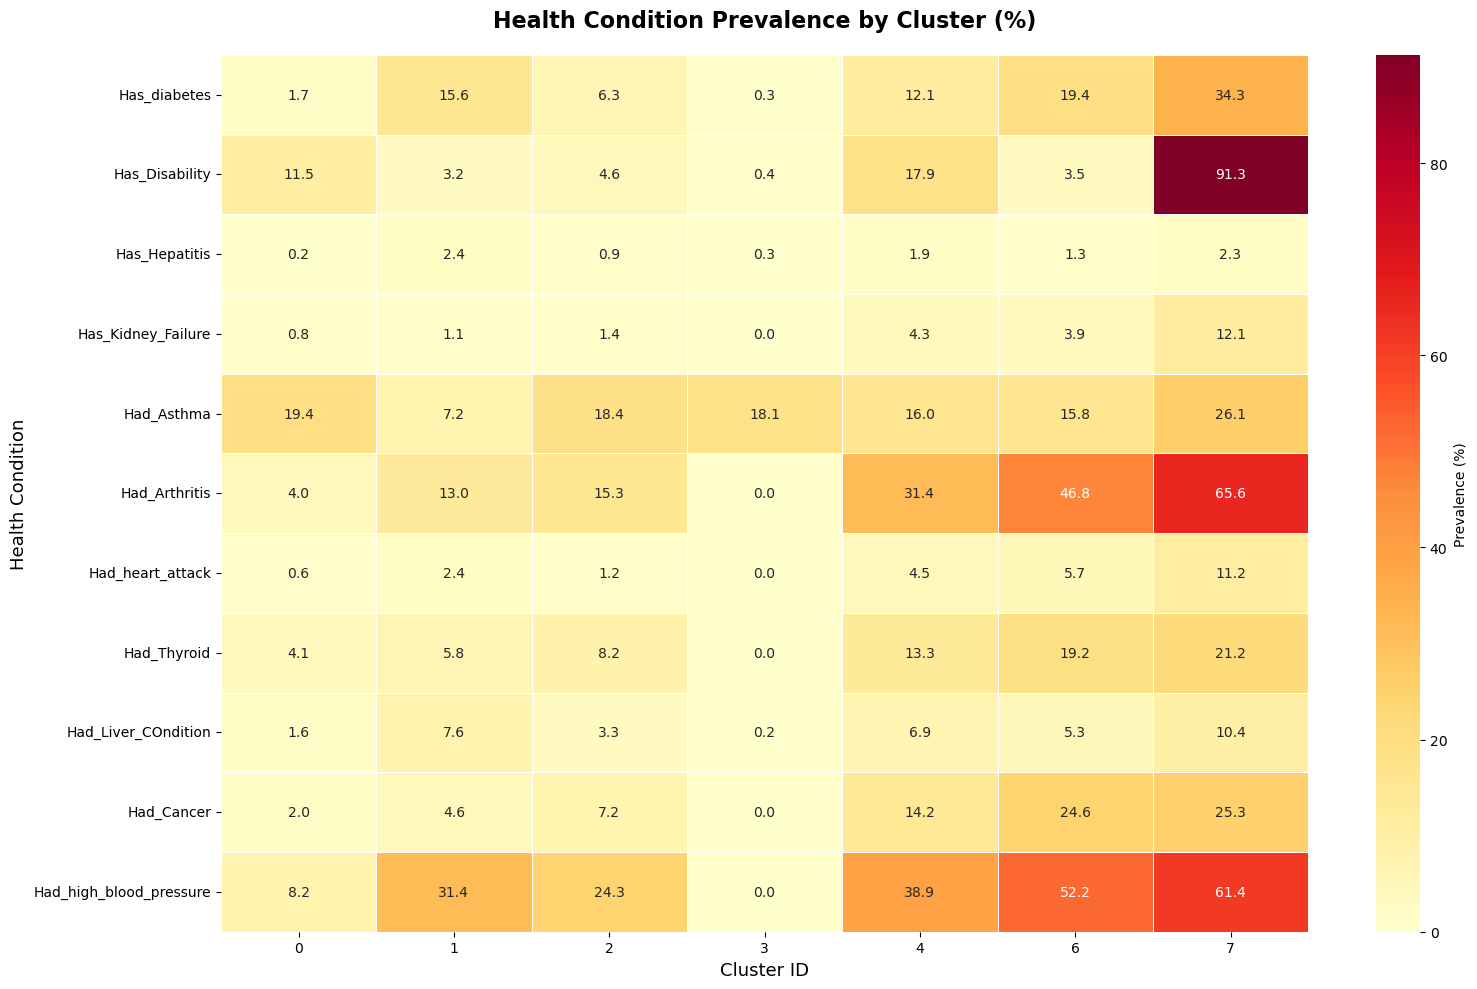

In [40]:
# ============================================================
# STEP 10: Create Visualization - Health Condition Heatmap
# ============================================================
print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# Health condition heatmap
plt.figure(figsize=(16, 10))
health_matrix = health_prevalence_df.set_index('Cluster').drop(columns=['Size'])
sns.heatmap(health_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Prevalence (%)'}, linewidths=0.5)
plt.title('Health Condition Prevalence by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Health Condition', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
print("✓ Saved: cluster_health_conditions_heatmap.png")
plt.show()

✓ Saved: cluster_age_distribution.png


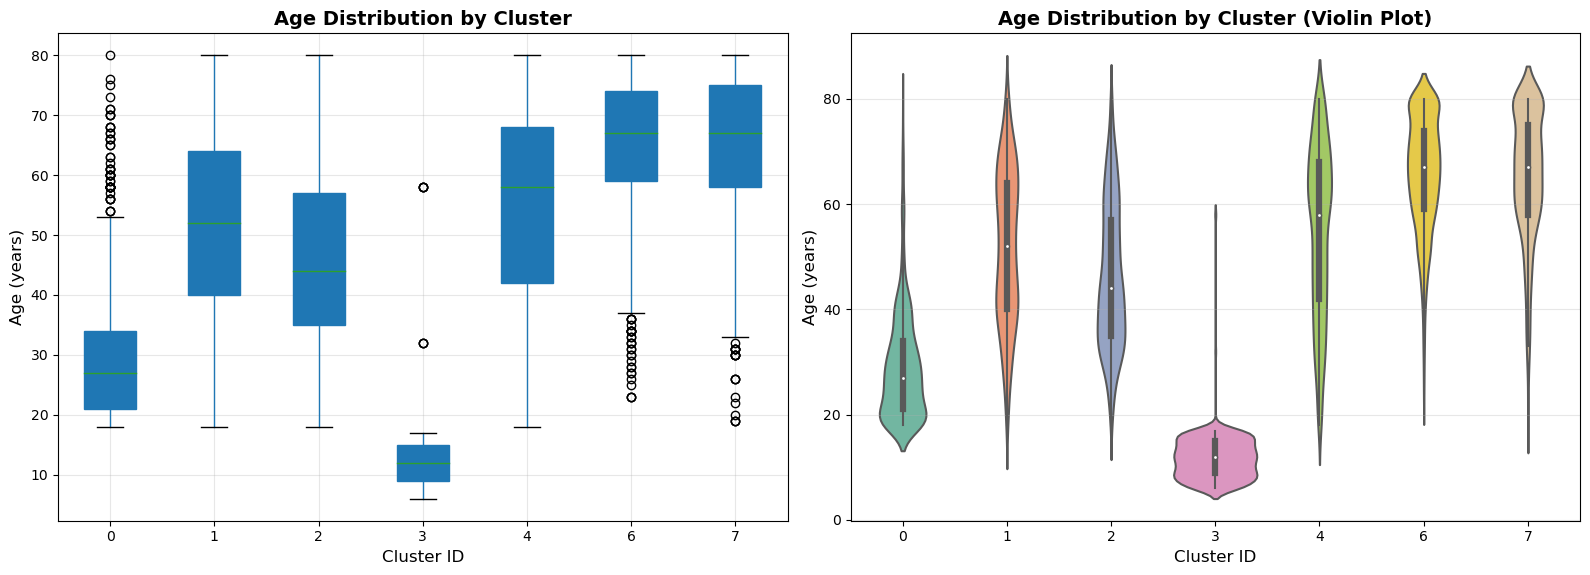

In [41]:
# ============================================================
# STEP 11: Age Distribution by Cluster
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df.boxplot(column='Age', by='umap_clusters', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
axes[0].get_figure().suptitle('')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='umap_clusters', y='Age', ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Cluster (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')


plt.tight_layout()
print("✓ Saved: cluster_age_distribution.png")
plt.show()

✓ Saved: cluster_clinical_measurements.png


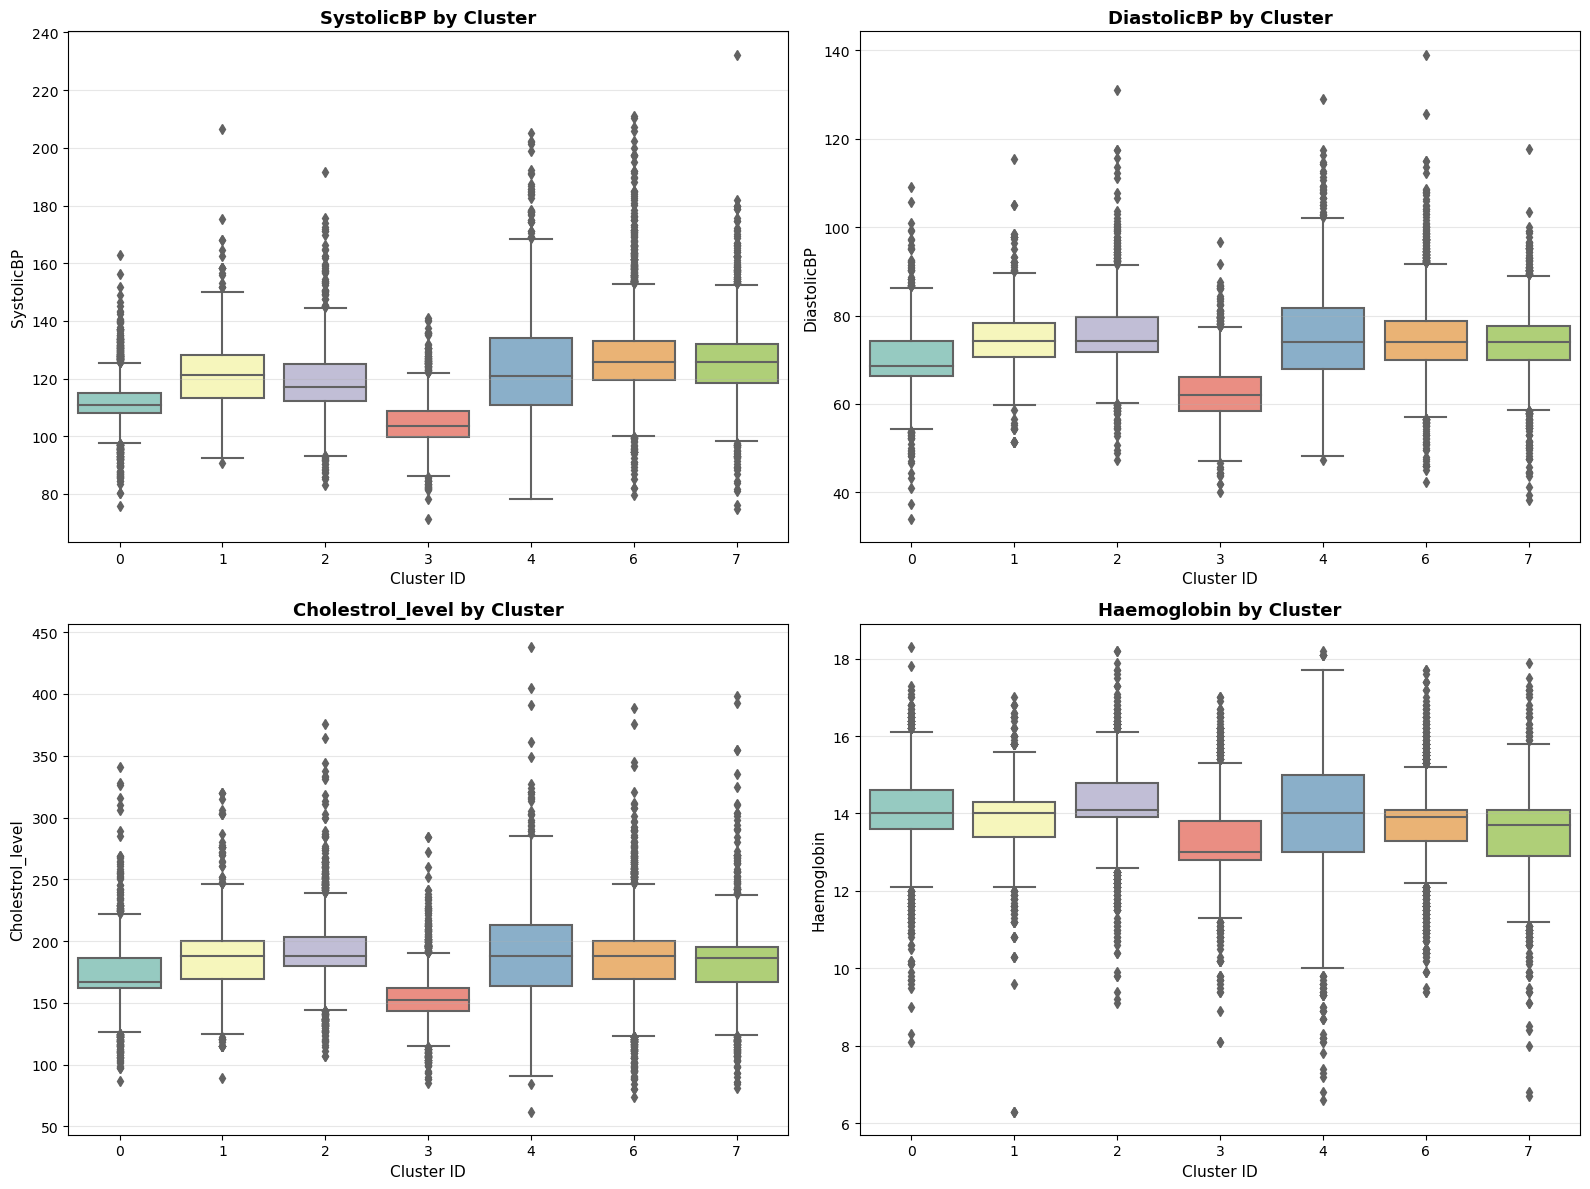

In [42]:
# ============================================================
# STEP 12: Clinical Measurements Comparison
# ============================================================
key_clinical = ['SystolicBP', 'DiastolicBP', 'Cholestrol_level', 'Haemoglobin']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, measure in enumerate(key_clinical):
    sns.boxplot(data=df, x='umap_clusters', y=measure, ax=axes[idx], palette='Set3')
    axes[idx].set_title(f'{measure} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=11)
    axes[idx].set_ylabel(measure, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_clinical_measurements.png")
plt.show()

✓ Saved: cluster_gender_distribution.png


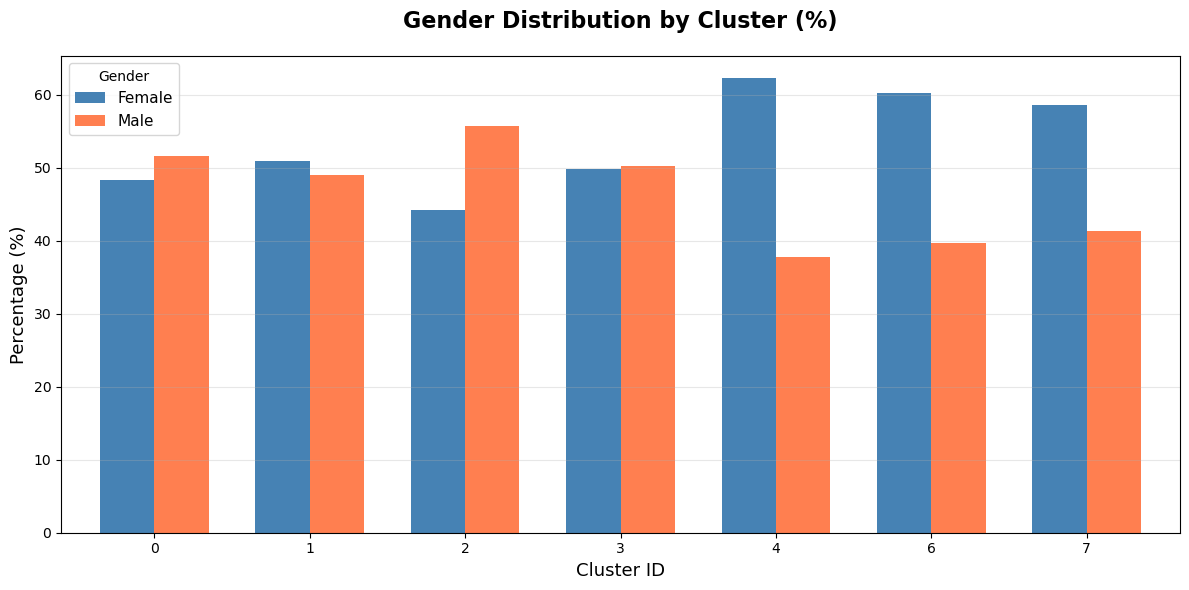

In [43]:
# ============================================================
# STEP 13: Gender Distribution by Cluster
# ============================================================
gender_cluster = pd.crosstab(df['umap_clusters'], df['Gender'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
gender_cluster.plot(kind='bar', stacked=False, ax=ax, color=['steelblue', 'coral'], width=0.7)
plt.title('Gender Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_gender_distribution.png")
plt.show()

✓ Saved: cluster_general_health_distribution.png


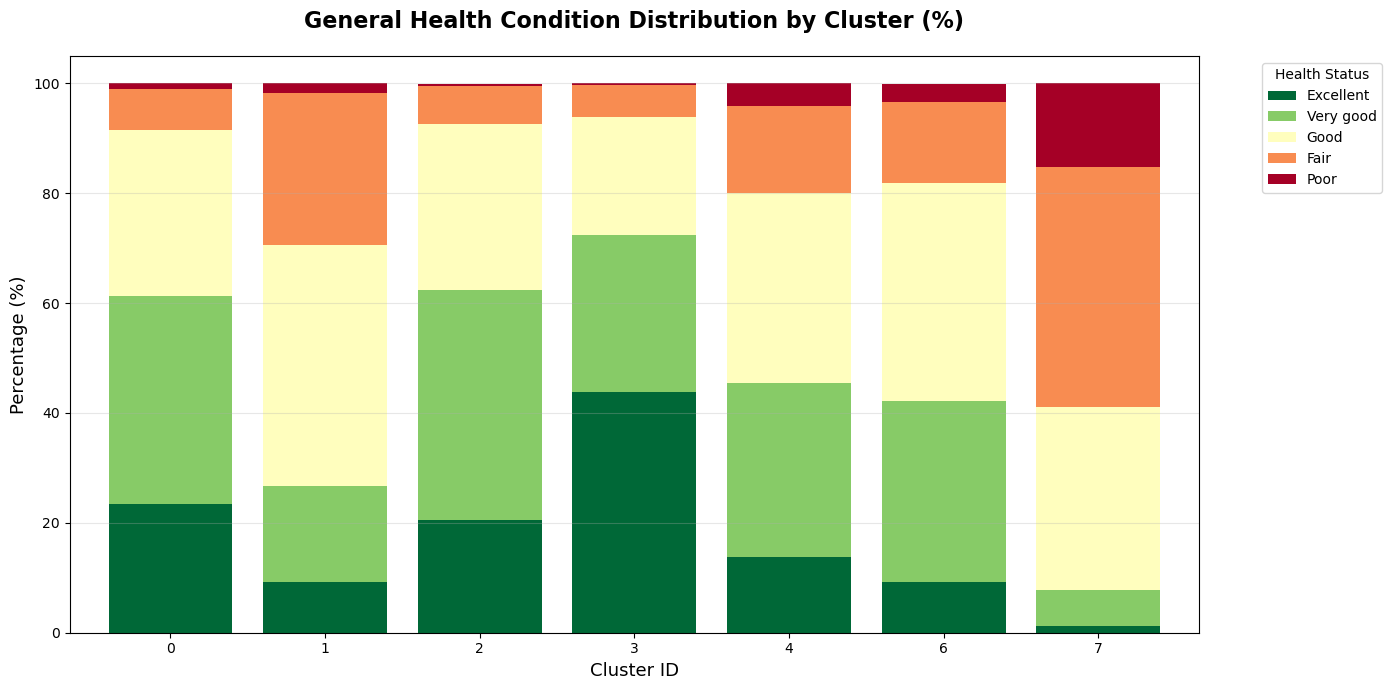

In [44]:
# ============================================================
# STEP 14: General Health Status by Cluster
# ============================================================
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
health_by_cluster = pd.crosstab(df['umap_clusters'], df['General_health_condition'], 
                                normalize='index') * 100

# Reorder columns
health_by_cluster = health_by_cluster.reindex(columns=[col for col in health_order if col in health_by_cluster.columns])

fig, ax = plt.subplots(figsize=(14, 7))
health_by_cluster.plot(kind='bar', stacked=True, ax=ax, 
                       colormap='RdYlGn_r', width=0.8)
plt.title('General Health Condition Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_general_health_distribution.png")
plt.show()

✓ Saved: cluster_composite_scores.png


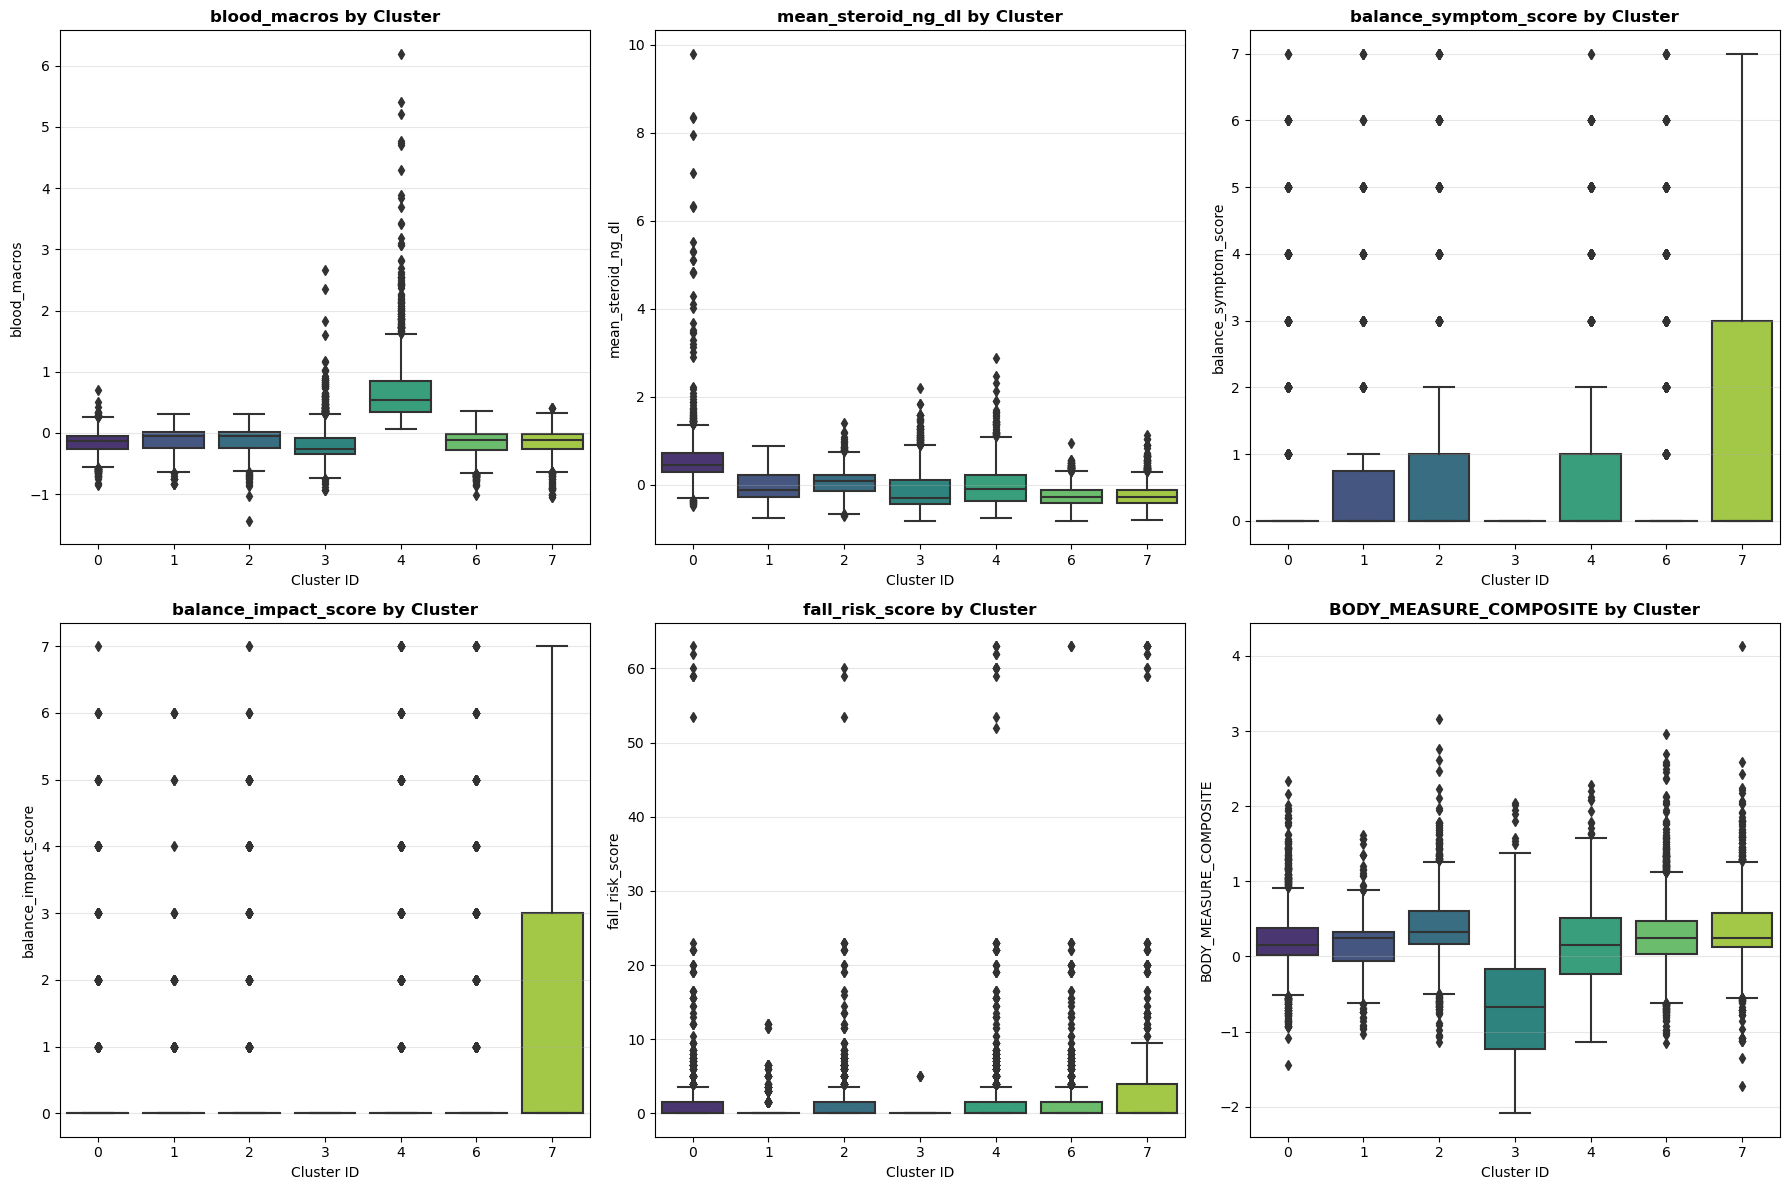

In [45]:
# ============================================================
# STEP 15: Composite Scores Comparison
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                     'balance_impact_score', 'fall_risk_score', 'BODY_MEASURE_COMPOSITE']

for idx, score in enumerate(numeric_composites):
    if score == 'fall_risk_score':
        # Filter outliers for visualization
        plot_data = df[df[score] < 100]
    else:
        plot_data = df
    
    sns.boxplot(data=plot_data, x='umap_clusters', y=score, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{score} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=10)
    axes[idx].set_ylabel(score, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_composite_scores.png")
plt.show()

In [46]:
# ============================================================
# STEP 17: Create Cluster Archetypes Summary
# ============================================================
print("\n" + "="*70)
print("CLUSTER ARCHETYPES - DETAILED SUMMARY")
print("="*70)

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'#'*70}")
    print(f"CLUSTER {cluster_id} ARCHETYPE")
    print(f"{'#'*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Demographics
    print(f"\n📊 DEMOGRAPHICS:")
    print(f"  Average Age: {cluster_data['Age'].mean():.0f} years")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    print(f"  Gender: {male_pct:.0f}% Male, {100-male_pct:.0f}% Female")
    
    # Top health conditions
    print(f"\n🏥 TOP HEALTH CONDITIONS (>20% prevalence):")
    has_conditions = False
    for condition in health_conditions:
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prev = (yes_count / len(cluster_data)) * 100
        if prev > 20:
            print(f"  - {condition.replace('_', ' ')}: {prev:.1f}%")
            has_conditions = True
    if not has_conditions:
        print(f"  - No major health conditions >20% prevalence")
    
    # Clinical highlights
    print(f"\n💉 CLINICAL HIGHLIGHTS:")
    print(f"  Blood Pressure: {cluster_data['SystolicBP'].mean():.0f}/{cluster_data['DiastolicBP'].mean():.0f} mmHg")
    print(f"  Cholesterol: {cluster_data['Cholestrol_level'].mean():.0f} mg/dL")
    print(f"  Hemoglobin: {cluster_data['Haemoglobin'].mean():.1f} g/dL")
    
    # Socioeconomic
    income_clean = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_clean[(income_clean > 0) & (income_clean <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        if income_ratio < 1.3:
            ses_label = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_label = "Low SES"
        elif income_ratio < 3.0:
            ses_label = "Middle SES"
        else:
            ses_label = "High SES"
        print(f"\n💰 SOCIOECONOMIC STATUS:")
        print(f"  Income/Poverty Ratio: {income_ratio:.2f} ({ses_label})")
        insurance_pct = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum() / len(cluster_data) * 100
        print(f"  Health Insurance: {insurance_pct:.0f}%")
    
    # General health
    print(f"\n🌟 GENERAL HEALTH STATUS:")
    health_dist = cluster_data['General_health_condition'].value_counts().head(3)
    for status, count in health_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  - {status}: {pct:.0f}%")
    
    print(f"\n{'-'*70}")


CLUSTER ARCHETYPES - DETAILED SUMMARY

######################################################################
CLUSTER 0 ARCHETYPE
######################################################################
Size: 1,419 patients (15.0%)

📊 DEMOGRAPHICS:
  Average Age: 29 years
  Gender: 52% Male, 48% Female

🏥 TOP HEALTH CONDITIONS (>20% prevalence):
  - No major health conditions >20% prevalence

💉 CLINICAL HIGHLIGHTS:
  Blood Pressure: 112/70 mmHg
  Cholesterol: 172 mg/dL
  Hemoglobin: 14.0 g/dL

💰 SOCIOECONOMIC STATUS:
  Income/Poverty Ratio: 2.45 (Middle SES)
  Health Insurance: 85%

🌟 GENERAL HEALTH STATUS:
  - Very good: 38%
  - Good: 30%
  - Excellent: 23%

----------------------------------------------------------------------

######################################################################
CLUSTER 1 ARCHETYPE
######################################################################
Size: 538 patients (5.7%)

📊 DEMOGRAPHICS:
  Average Age: 52 years
  Gender: 49% Male, 51% Female

